## Part 2.1

According to the heat map below, we can see that there is, on average, a moderate negative correlation between the gender and various male dominated traits (Height, Weight, etc.) and a moderate positive correlation between gender and female dominated traits (Total Fat Content, Total Body Fat Ratio, etc.). For example, as gender "increases" the weight decreases. Gender is encoded only with 2 integer values. We can assume that when we have the greater value (1), the weight values will not be as high, representing a strong negative correlation between the traits (approximately -0.73).

In [6]:
from DataInvestigator import df
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
selected_columns = [
    "Gender",
    "Height",
    "Weight",
    "Lean Mass (LM) (%)",
    "Muscle Mass (MM)",
    "Visceral Muscle Area (VMA) (Kg)",
    "Total Fat Content (TFC)",
    "Total Body Fat Ratio (TBFR) (%)",
    "Obesity (%)"
]

filtered_df= df[selected_columns]
corr_matrix = filtered_df.corr()

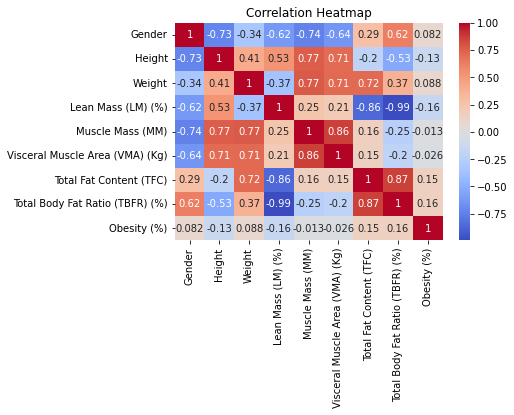

In [8]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()